In [13]:
#Importing Dependencies
import pandas as pd
from pathlib import Path
import os
import csv
import matplotlib.pyplot as plt

In [14]:
#Setting Path where Dataset is located
superbowl_commercials = "Resources/superbowl_commercials.csv"

#Reading in CSV and dropping Youtube/Superbowl Ads Link
commercials_data = pd.read_csv(superbowl_commercials)

commercials_data = commercials_data.drop(columns = ["Youtube Link", "Superbowl Ads Link"])

#Setting Year as the index in DataFrame
commercials_data = commercials_data.set_index("Year")

#Displaying DataFrame
commercials_data.head()

,Brand,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
Year,,,,,,,,,,,,,
2000,E-Trade,True,True,False,False,False,True,False,30,2.1,13615.0,84.0,88.47
2000,E-Trade,True,True,False,False,True,False,False,30,2.1,72772.0,146.0,88.47
2000,Budweiser,True,True,False,False,False,False,False,30,2.1,5399.0,11.0,88.47
2000,Bud Light,True,True,False,False,True,False,False,30,2.1,6699.0,8.0,88.47
2000,Budweiser,True,False,False,False,False,True,False,30,2.1,18972.0,6.0,88.47


In [6]:
#Displaying all of the Brands in Dataset
commercials_data["Brand"].unique()

array(['E-Trade', 'Budweiser', 'Bud Light', 'Pepsi', 'Doritos', 'NFL',
       'Toyota', 'Coca-Cola', 'Hyundai', 'Kia'], dtype=object)

In [15]:
#Calculating the Mean and Sum for YouTube Views and Likes for each Brand
brand_mean = commercials_data.groupby("Brand").mean(numeric_only = True)[["Youtube Views", "Youtube Likes"]]

brand_sum = commercials_data.groupby("Brand").sum(numeric_only = True)[["Youtube Views", "Youtube Likes"]]

#Creating a DataFrame for the Mean and Sum for each brand
brand_stats = pd.DataFrame({"Mean Youtube Likes": brand_mean["Youtube Likes"],
                            "Mean Youtube Views": brand_mean["Youtube Views"],
                            "Youtube Likes Sum": brand_sum["Youtube Likes"],
                           "Youtube Views Sum": brand_sum["Youtube Views"]})

#Displaying DataFrame
brand_stats.round(2)

,Mean Youtube Likes,Mean Youtube Views,Youtube Likes Sum,Youtube Views Sum
Brand,,,,
Bud Light,1924.45,331006.29,107769.00,19198365.0
Budweiser,2803.81,989721.62,103740.92,38599143.0
Coca-Cola,14718.71,1906345.33,309093.00,40033252.0
Doritos,15094.56,9011677.44,377364.00,225291936.0
E-Trade,201.86,127924.64,2826.00,1790945.0
Hyundai,307.59,59164.55,6767.00,1301620.0
Kia,302.67,40913.69,3632.00,531878.0
NFL,25276.44,4355661.67,227488.00,39200955.0
Pepsi,719.79,129962.56,17275.00,3249064.0


In [16]:
#Grabbing brands and their YouTube Views/Likes and grouping them by Industry
food_beverage = brand_stats.loc[["Bud Light", "Budweiser", "Coca-Cola", "Doritos", 
                              "Pepsi"], ["Youtube Likes Sum", "Youtube Views Sum"]]

automotive = brand_stats.loc[["Hyundai", "Kia", "Toyota"], ["Youtube Likes Sum", "Youtube Views Sum"]]

sports = brand_stats.loc[["NFL"], ["Youtube Likes Sum", "Youtube Views Sum"]]

financial = brand_stats.loc[["E-Trade"], ["Youtube Likes Sum", "Youtube Views Sum"]]

#Taking the average of each Industry
food_likes = food_beverage["Youtube Likes Sum"].sum()/5

auto_likes = automotive["Youtube Likes Sum"].sum()/3

sports_likes = sports["Youtube Likes Sum"].sum()/1

financial_likes = financial["Youtube Likes Sum"].sum()/1

food_industry = "Food and Beverage"
auto_industry = "Automotive"
sports_industry = "Sports and Entertainment"
financial_industry = "Financial Services"

industry_likes = pd.DataFrame({"Average Youtube Likes": [food_likes, auto_likes, sports_likes, financial_likes]},
                          index = [food_industry, auto_industry, sports_industry, financial_industry])

industry_likes.round(2)

,Average Youtube Likes
Food and Beverage,183048.38
Automotive,9815.67
Sports and Entertainment,227488.00
Financial Services,2826.00


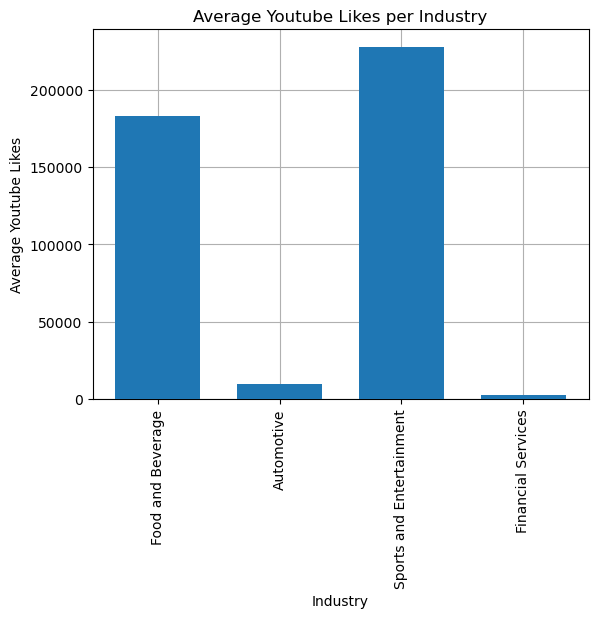

In [41]:
#Establishing Variables for Bar Graph
youtube_likes = industry_likes["Average Youtube Likes"]

industry = industry_likes.index.values

#Creating Bar Graph for Average Likes per Industry
plt.bar(industry, youtube_likes, width = 0.7, zorder = 3);

#Adding Specific Ticks and their location/rotations
tick_locations = [value for value in industry]
plt.xticks(tick_locations)
plt.xticks(rotation = 90)

#Adding Labels to X/Y Axis and Title for Graph
plt.xlabel("Industry")
plt.ylabel("Average Youtube Likes")
plt.title("Average Youtube Likes per Industry")
plt.grid(zorder = 0);

In [18]:
#Taking the average Youtube Views for each industry
food_views = food_beverage["Youtube Views Sum"].sum()/5

auto_views = automotive["Youtube Views Sum"].sum()/3

sports_views = sports["Youtube Views Sum"].sum()/1

financial_views = financial["Youtube Views Sum"].sum()/1

#Creating Dataframe to represent each industries averages
food_industry = "Food and Beverage"
auto_industry = "Automotive"
sports_industry = "Sports and Entertainment"
financial_industry = "Financial Services"

industry_views = pd.DataFrame({"Average Youtube Views": [food_views, auto_views, sports_views, financial_views]},
                          index = [food_industry, auto_industry, sports_industry, financial_industry])

industry_views.round(2)

,Average Youtube Views
Food and Beverage,65274352.00
Automotive,1549542.33
Sports and Entertainment,39200955.00
Financial Services,1790945.00


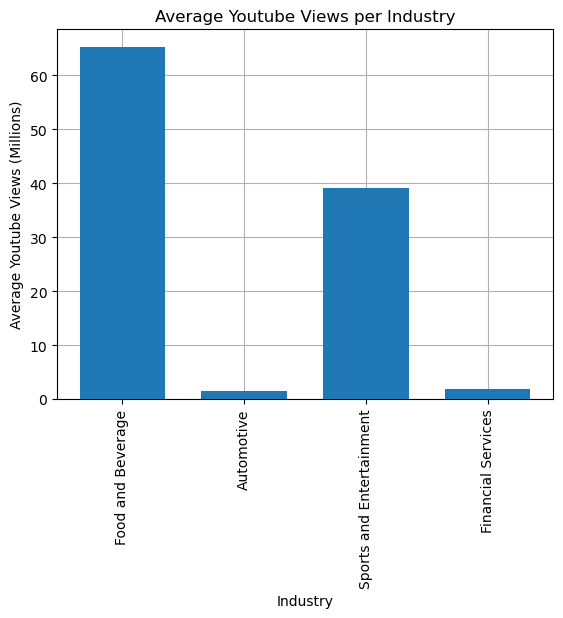

In [39]:
#Establishing Variables for Bar Graph
youtube_views = industry_views["Average Youtube Views"]/1000000

industry = industry_likes.index.values

#Creating Bar Graph for Average Views per Industry
plt.bar(industry, youtube_views, width = 0.7, zorder = 3);

#Adding Specific Ticks and their location/rotations
tick_locations = [value for value in industry]
plt.xticks(tick_locations)
plt.xticks(rotation = 90)

#Adding Labels to X/Y Axis and Title for Graph
plt.xlabel("Industry")
plt.ylabel("Average Youtube Views (Millions)")
plt.title("Average Youtube Views per Industry")
plt.grid(zorder = 0);

In [22]:
#Grabbing Commerials that have specific commercial types and taking the average youtube views for each
funny = commercials_data[commercials_data.Funny != False]
views_funny = funny.mean(numeric_only = True)["Youtube Views"]/1000000

patriotic = commercials_data[commercials_data.Patriotic != False]
views_patriotic = patriotic.mean(numeric_only = True)["Youtube Views"]/1000000

danger = commercials_data[commercials_data.Danger != False]
views_danger = danger.mean(numeric_only = True)["Youtube Views"]/1000000

animals = commercials_data[commercials_data.Animals != False]
views_animals = animals.mean(numeric_only = True)["Youtube Views"]/1000000

sex = commercials_data[commercials_data["Uses Sex"] != False]
views_sex = sex.mean(numeric_only = True)["Youtube Views"]/1000000

product = commercials_data[commercials_data["Shows Product Quickly"] != False]
views_product = product.mean(numeric_only = True)["Youtube Views"]/1000000

#Creating a DataFrame from the Summary Statistics 
commercial_views = pd.DataFrame({"Average Youtube Views (Millions)": [views_funny, views_patriotic,
                                                            views_danger, views_animals,
                                                            views_sex, views_product]
                            }, index = ["Funny", "Patriotic", "Danger", "Animals", "Uses Sex", "Shows Product Quickly"])

commercial_views.round(2)

,Average Youtube Views (Millions)
Funny,1.64
Patriotic,1.86
Danger,1.42
Animals,0.89
Uses Sex,0.20
Shows Product Quickly,1.69


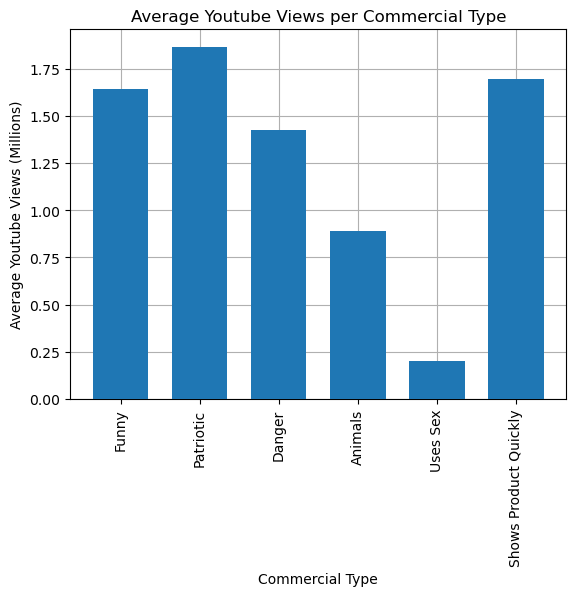

In [37]:
#Creating Graph to compare Commercial Types based on Average Youtube Views
c_types = ["Funny", "Patriotic", "Danger", "Animals", "Uses Sex", "Shows Product Quickly"]
c_means = [views_funny, views_patriotic, views_danger, views_animals, views_sex, views_product]

plt.bar(c_types, c_means, width = 0.7, zorder = 3);

#Adding Specific Ticks and their location/rotations
tick_locations = [value for value in c_types]
plt.xticks(tick_locations)
plt.xticks(rotation = 90)

#Adding Labels to X/Y Axis and Title for Graph
plt.xlabel("Commercial Type")
plt.ylabel("Average Youtube Views (Millions)")
plt.title("Average Youtube Views per Commercial Type")
plt.grid(zorder = 0);

In [24]:
#Grabbing values that are True for all Commercial Types and taking the average youtube likes
funny = commercials_data[commercials_data.Funny != False]
likes_funny = funny.mean(numeric_only = True)["Youtube Likes"]

patriotic = commercials_data[commercials_data.Patriotic != False]
likes_patriotic = patriotic.mean(numeric_only = True)["Youtube Likes"]

danger = commercials_data[commercials_data.Danger != False]
likes_danger = danger.mean(numeric_only = True)["Youtube Likes"]

animals = commercials_data[commercials_data.Animals != False]
likes_animals = animals.mean(numeric_only = True)["Youtube Likes"]

sex = commercials_data[commercials_data["Uses Sex"] != False]
likes_sex = sex.mean(numeric_only = True)["Youtube Likes"]

product = commercials_data[commercials_data["Shows Product Quickly"] != False]
likes_product = product.mean(numeric_only = True)["Youtube Likes"]

#Creating a DataFrame from the Summary Statistics 
commercial_likes = pd.DataFrame({"Average Youtube Likes": [likes_funny, likes_patriotic,
                                                            likes_danger, likes_animals,
                                                            likes_sex, likes_product]}, 
                                index = ["Funny", "Patriotic", "Danger", "Animals", "Uses Sex", "Shows Product Quickly"])

commercial_likes.round(2)

,Average Youtube Likes
Funny,4606.43
Patriotic,8663.66
Danger,6579.91
Animals,3596.47
Uses Sex,502.19
Shows Product Quickly,5344.32


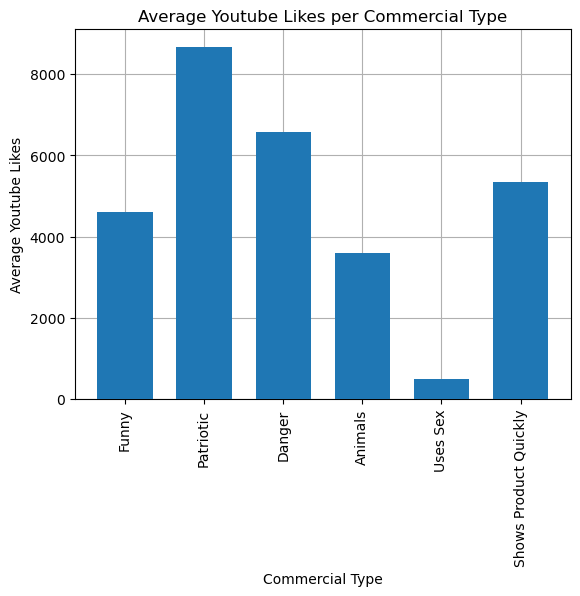

In [38]:
#Creating Graph to compare Commercial Types based on Average Youtube Likes
c_types = ["Funny", "Patriotic", "Danger", "Animals", "Uses Sex", "Shows Product Quickly"]
c_means = [likes_funny, likes_patriotic, likes_danger, likes_animals, likes_sex, likes_product]

plt.bar(c_types, c_means, width = 0.7, zorder = 3);

#Adding Specific Ticks and their location/rotations
tick_locations = [value for value in c_types]
plt.xticks(tick_locations)
plt.xticks(rotation = 90)

#Adding Labels to X/Y Axis and Title for Graph
plt.xlabel("Commercial Type")
plt.ylabel("Average Youtube Likes")
plt.title("Average Youtube Likes per Commercial Type")
plt.grid(zorder = 0);